In [93]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("housing.csv")

## Data Analyis

In [95]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [97]:
ocean_prox = df['ocean_proximity']

In [98]:
from sklearn.neighbors import KNeighborsRegressor

def impute_knn(df):
    ldf = df.select_dtypes(include=[np.number])                 #Selects columns that take in numberical values
    ldf_excluded = df.select_dtypes(exclude=[np.number])        #Selects columns that take in categorical data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()           #Defines columns with NAN values
    cols_no_nan = ldf.columns.difference(cols_nan).values       #Defines columns without NAN values

    for col in cols_nan:
        imp_test = ldf[ldf[col].isna()]                         # indicies which have missing data will become our test set
        imp_train = ldf.dropna()                                # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)              
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ldf,ldf_excluded],axis=1)

In [99]:
# Call function that imputes missing data
df = impute_knn(df)

# looks like we have a full feature matrix
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [100]:
print(df['ocean_proximity'].unique())

#One hot encodes the oceanproximity column (The only categorical data in the df)
df = pd.get_dummies(df, columns=['ocean_proximity'], dtype='int') 
df

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [101]:
def create_plots(df, col):              #function to create histograms
    plt.figure()
    sns.set(style='whitegrid')
    sns.histplot(df, x=col)
    title = col + " histogram"
    plt.title(title)

### Univariate Histograms

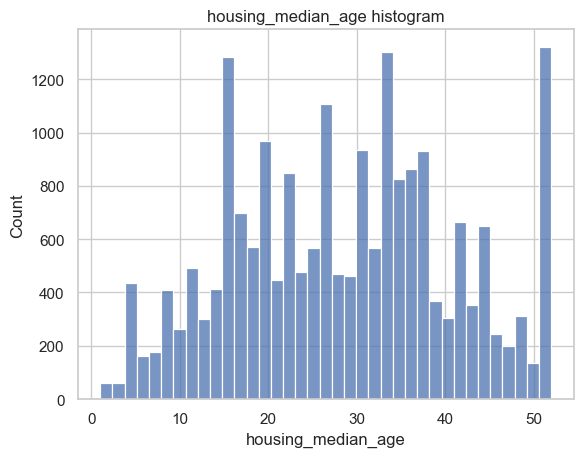

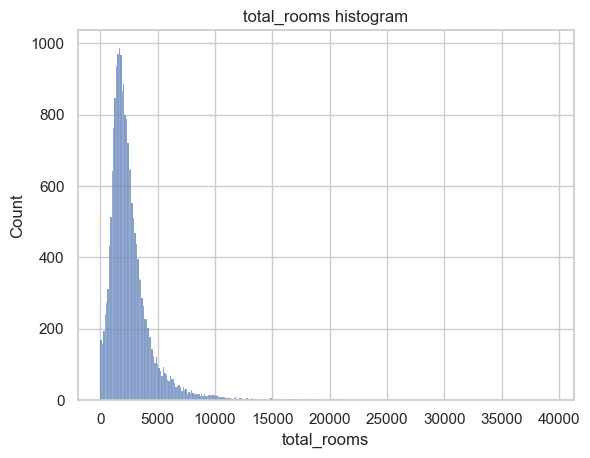

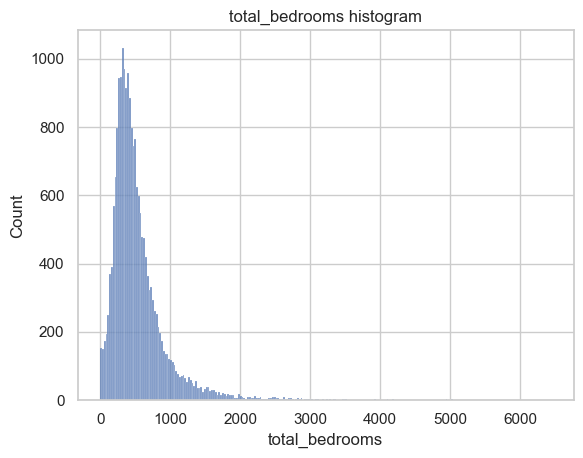

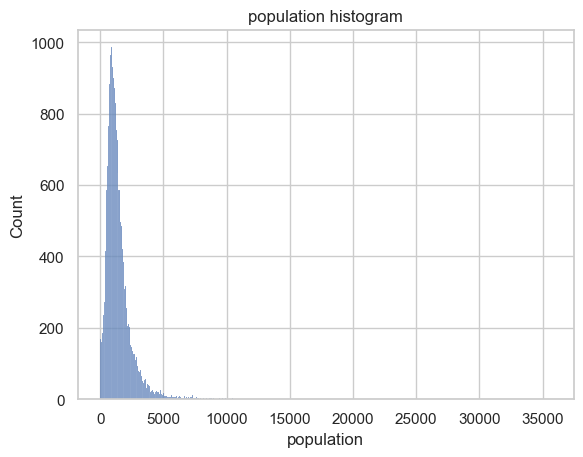

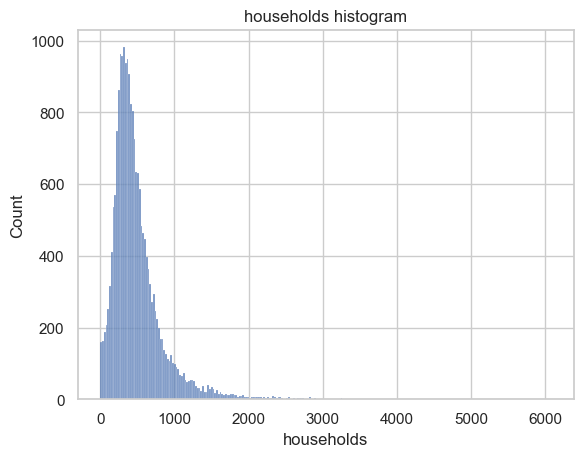

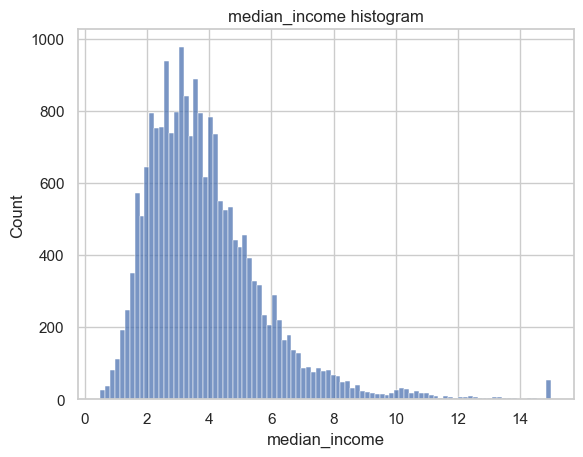

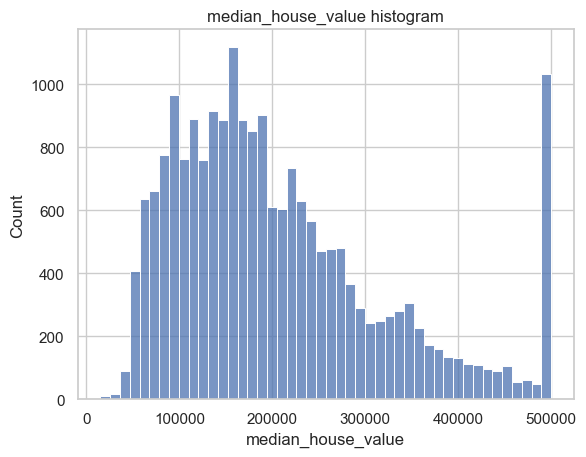

In [102]:
hist = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

for cols in hist:
    create_plots(df, cols)

Apparent Outliers: 
It would appear that the both median_house_value and median house age both have a large bin count at the end of their buckets. This could suggest that the way the data was collected had just grouped expensive houses into a single bucket. This would make sense as there are many expensive real estates in California.

Observations:
Many of the histograms are skewed to the left. There also seems to be a large range of x values which indicates that there are outliers present. Most of the variables also seem to be uni-model as well.

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

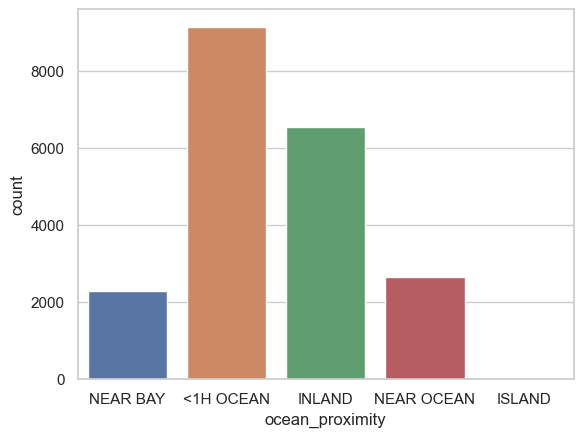

In [103]:
sns.countplot(x=ocean_prox)

In [104]:
def corrMat(df,id=False):
    sns.set(font_scale=0.5)
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  

C:\Users\dougl\AppData\Local\Temp\ipykernel_1216\2429898428.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype=np.bool)


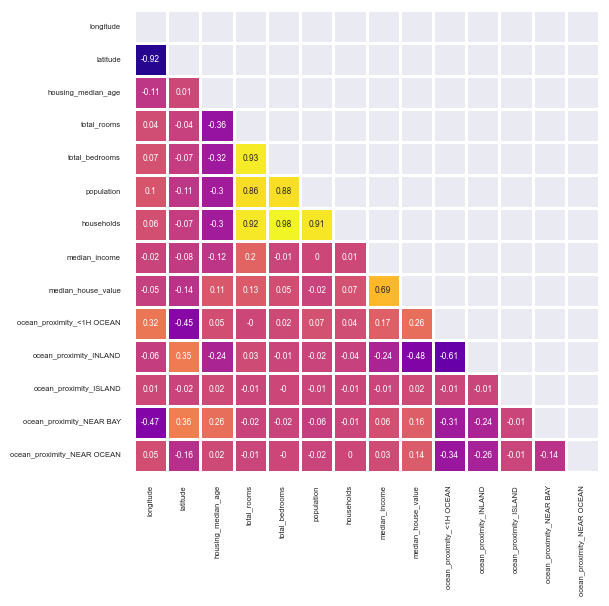

In [105]:
corrMat(df)             

Observations: 

- Median income seems to strongly correlate with our target variable.

- Poopulation, total rooms, and total bedrooms seems to have a strong correlation with each other

- Many weak correlations between the range of -0.05 and 0.05 for the median house value. This could mean that they do not affect change the price of the house value by much, but this could also be due to a nonlinear relationship ship as well


In [106]:
import ppscore as pps

#The closer the ppscore is to 1, the greater the predictive power of the variable to median house value
predictors_df = pps.predictors(df, y="median_house_value", cross_validation=10)             
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,longitude,median_house_value,0.152823,regression,True,mean absolute error,88058.5476,74601.138634,DecisionTreeRegressor()
1,ocean_proximity_INLAND,median_house_value,0.129138,regression,True,mean absolute error,88058.5476,76686.814078,DecisionTreeRegressor()
2,latitude,median_house_value,0.103636,regression,True,mean absolute error,88058.5476,78932.496638,DecisionTreeRegressor()
3,median_income,median_house_value,0.050010,regression,True,mean absolute error,88058.5476,83654.738833,DecisionTreeRegressor()
4,ocean_proximity_<1H OCEAN,median_house_value,0.008448,regression,True,mean absolute error,88058.5476,87314.625351,DecisionTreeRegressor()
5,housing_median_age,median_house_value,0.000000,regression,True,mean absolute error,88058.5476,89231.410175,DecisionTreeRegressor()
6,total_rooms,median_house_value,0.000000,regression,True,mean absolute error,88058.5476,117476.284233,DecisionTreeRegressor()
7,total_bedrooms,median_house_value,0.000000,regression,True,mean absolute error,88058.5476,102150.229192,DecisionTreeRegressor()
8,population,median_house_value,0.000000,regression,True,mean absolute error,88058.5476,111877.092558,DecisionTreeRegressor()
9,households,median_house_value,0.000000,regression,True,mean absolute error,88058.5476,102316.796670,DecisionTreeRegressor()


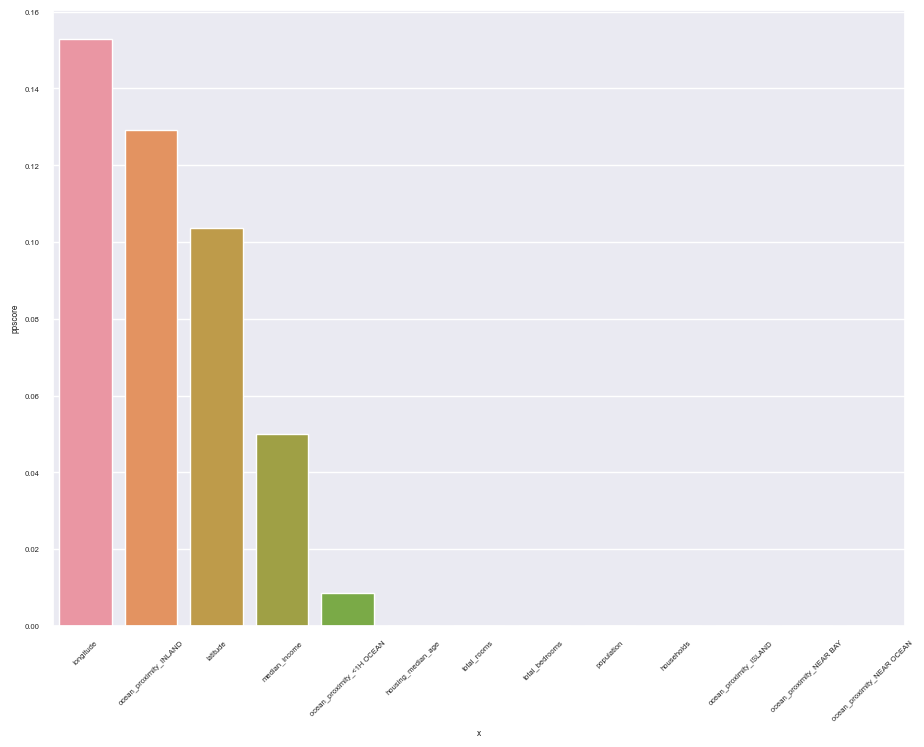

In [107]:
plt.figure(figsize=(11, 8), )
plt.xticks(rotation=45)
sns.barplot(data=predictors_df, x="x", y="ppscore")
plt.show()

In [108]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

# defining a simple plot function, input list containing features of names found in dataframe
def plotTwo(df,lst):
    
    # load california from module, common for all plots
    cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
    cali = cali.assign(area=cali.geometry.area)
    
    # Create a geopandas geometry feature; input dataframe should contain .longtitude, .latitude
    gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))
    proj=gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944) # related to view

    ii=-1
    fig,ax = plt.subplots(1,2,figsize=(21,6),subplot_kw={'projection': proj})
    for i in lst:

        ii+=1
        tgdf = gdf.sort_values(by=i,ascending=True) 
        gplt.polyplot(cali,projection=proj,ax=ax[ii]) # the module already has california 
        gplt.pointplot(tgdf,ax=ax[ii],hue=i,cmap='plasma',legend=True,alpha=1.0,s=3) # 
        ax[ii].set_title(i)

    plt.tight_layout()
    plt.subplots_adjust(wspace=-0.5)

C:\Users\dougl\AppData\Local\Temp\ipykernel_1216\2232266781.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cali = cali.assign(area=cali.geometry.area)
C:\Users\dougl\AppData\Local\Temp\ipykernel_1216\2232266781.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cali = cali.assign(area=cali.geometry.area)


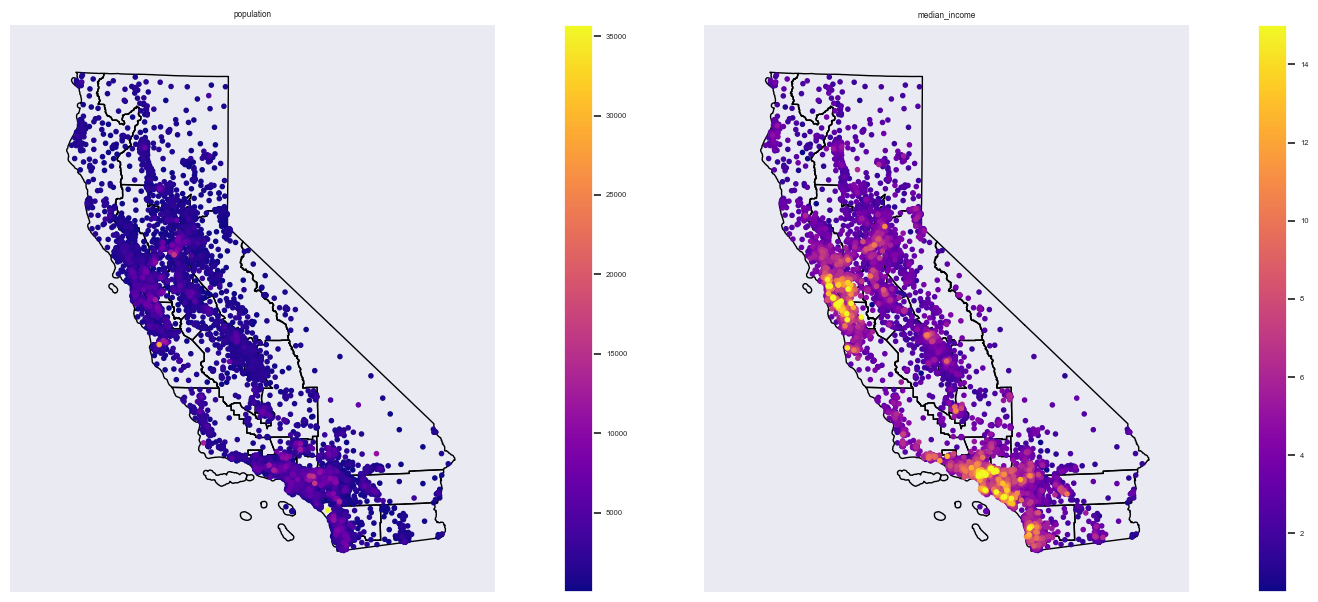

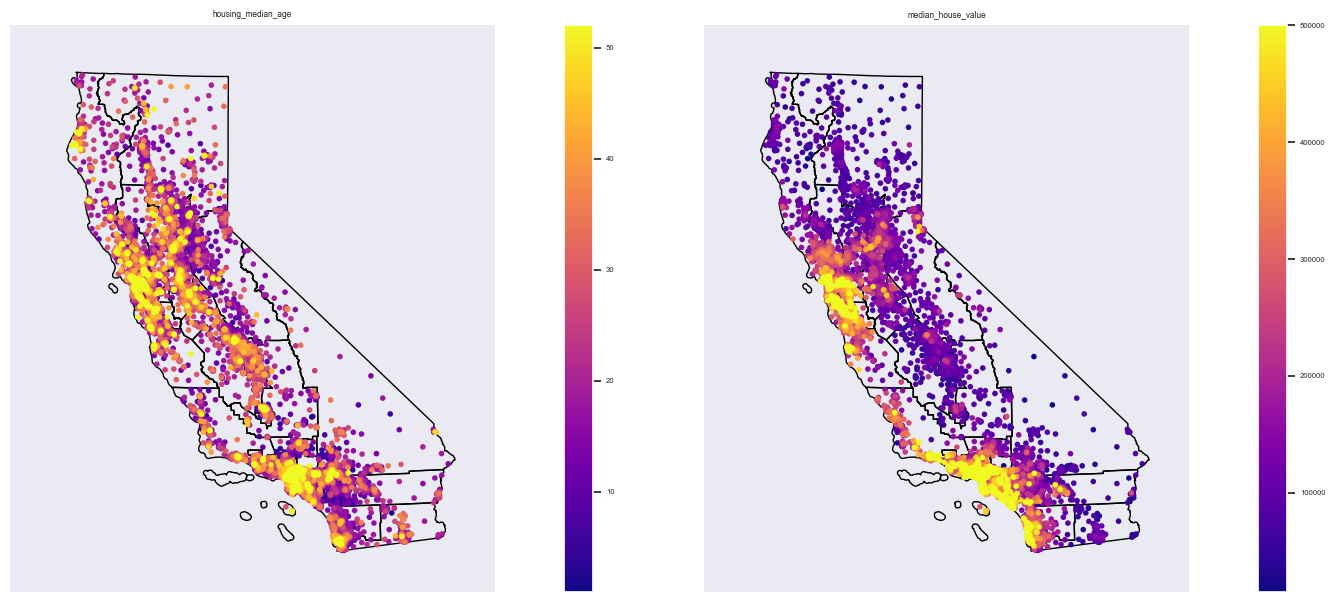

In [109]:
# Call function that plots two geopandas plots 
plotTwo(df,['population','median_income'])
plotTwo(df,['housing_median_age','median_house_value'])

Observations:

- It would appear that the location of the house strongly correlates with the median income shown by the densely populated 

- It also looks like the higher median age houses are concentrated around the areas that have the highest median values

### Removing Outliers

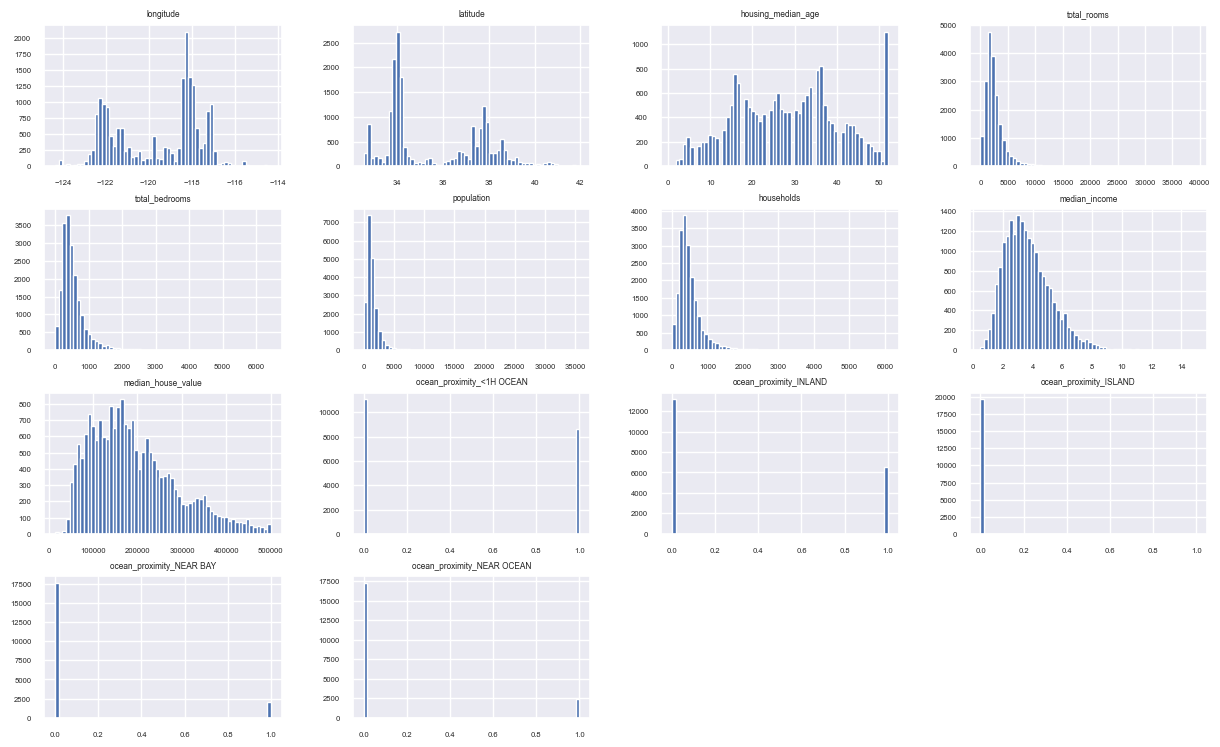

In [110]:
maxval2 = df['median_house_value'].max() # get the maximum value
df = df[df['median_house_value'] != maxval2] 
df.hist(bins=60, figsize=(15,9))
plt.show()

## Feature Engineering

C:\Users\dougl\AppData\Local\Temp\ipykernel_1216\2429898428.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype=np.bool)


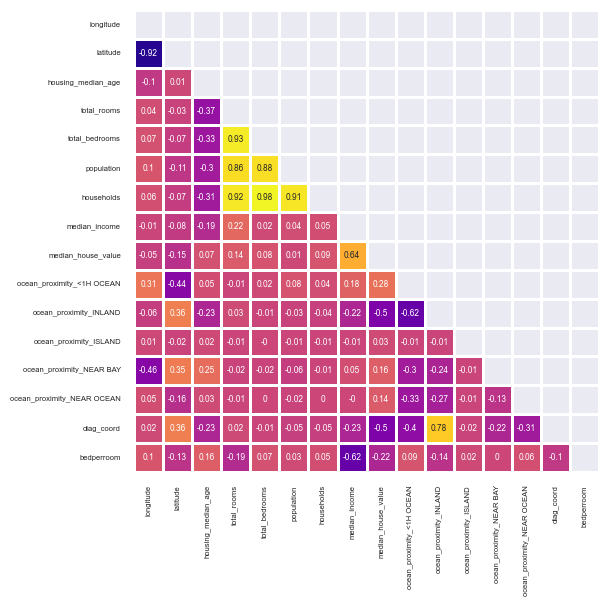

In [111]:
# Make a feature that contains both longtitude & latitude
df_upd = df.copy()
df_upd['diag_coord'] = (df['longitude'] + df['latitude'])         # 'diagonal coordinate', works for this coord
df_upd['bedperroom'] = df['total_bedrooms']/df['total_rooms']     # feature w/ bedrooms/room ratio
corrMat(df_upd)

## Data Processing

In [112]:
x = df.drop(axis=1, columns=['median_house_value'])
y = df['median_house_value']

x_upd = df_upd.drop(axis=1, columns=['median_house_value'])
y_upd = df_upd['median_house_value']


In [113]:
from sklearn.model_selection import train_test_split

#Creating training, evaluation, and test sets for data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size=0.5)

x_upd_train, x_upd_test, y_upd_train, y_upd_test = train_test_split(x_upd, y_upd, test_size=0.3)
x_upd_test, x_upd_eval, y_upd_test, y_upd_eval = train_test_split(x_upd_test, y_upd_test, test_size=0.5)

## Machine Learning Model Building

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def evaluation_model(model, x_eval, y_eval):
    y_pred = model.predict(x_eval)
    score = mean_squared_error(y_eval, y_pred, squared=False)
    MAE = mean_absolute_error(y_eval, y_pred)
    r2 = r2_score(y_eval, y_pred)    
    print(f"RMSE:\n{score}\n")
    print(f"MAE:\n{MAE}\n")
    print(f"R2:\n{r2}")

In [141]:
base_model = LinearRegression().fit(x_train,y_train)
evaluation_model(base_model, x_eval, y_eval)

RMSE:
63148.9420781042

MAE:
45534.319832147674

R2:
0.5820811579360501


I choose to use Root Mean Square Error and Mean Average Error to evaluate the following ML models because they both provide an absolute measure of deviation from the data as well as each having their own strengths. For example RMSE does much better at punishing huge outliers. As we can see from these results, using baseline linear regression gives us subpar results. This is probably due to the nonlinearity in the data which is why we will test different machine learning models that better adapt to nonlinearity.

In [145]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(x_train, y_train)
evaluation_model(gnb, x_eval, y_eval)

RMSE:
100688.08842268163

MAE:
69215.49153116532

R2:
-0.06246830908048029


In [144]:
from sklearn.svm import SVR

svr = SVR(C=1000000).fit(x_train, y_train)
evaluation_model(svr, x_eval, y_eval)

RMSE:
84950.91882970088

MAE:
65341.59517693542

R2:
0.24369677121839572


In [146]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor().fit(x_train, y_train)
evaluation_model(knn, x_eval, y_eval)

RMSE:
91909.45367781837

MAE:
71565.67764227642

R2:
0.11472099945953196


In [147]:
from sklearn.ensemble import HistGradientBoostingRegressor

gbr = HistGradientBoostingRegressor().fit(x_train, y_train)
evaluation_model(gbr, x_eval, y_eval)

RMSE:
46284.84979713389

MAE:
30785.556537104745

R2:
0.7754890586886627


It would appear that out of all the baseline ML models that were tested, the Gradient Boosting model worked the best.

In [153]:
gbr_upd = HistGradientBoostingRegressor(random_state=1).fit(x_upd_train, y_upd_train)
evaluation_model(gbr_upd, x_upd_eval, y_upd_eval)

RMSE:
42435.18972904584

MAE:
28807.82086647487

R2:
0.8109334389668995


It would appear that the engineered features overall improved the output of the Gradient Boosting Regressor model.

In [138]:
gbr.get_params()

{'categorical_features': None,
 'early_stopping': 'auto',
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'quantile': None,
 'random_state': None,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [165]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate':[0.05, 0.1, 0.2], 'max_leaf_nodes':[15, 30, 45], 'l2_regularization':[0, 0.5, 1, 2], 'random_state':[1]}
grid = GridSearchCV(gbr_upd, params)
model = grid.fit(x_upd_train, y_upd_train)
evaluation_model(model, x_upd_eval, y_upd_eval)
model.get_params

RMSE:
41687.33550777175

MAE:
28105.420859807098

R2:
0.8175387257584961


<bound method BaseEstimator.get_params of GridSearchCV(estimator=HistGradientBoostingRegressor(l2_regularization=2,
                                                     max_leaf_nodes=45,
                                                     random_state=1),
             param_grid={'l2_regularization': [0, 0.5, 1, 2],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_leaf_nodes': [15, 30, 45], 'random_state': [1]})>

In [166]:
model.best_estimator_

HistGradientBoostingRegressor(l2_regularization=2, max_leaf_nodes=45,
                              random_state=1)

In [167]:
evaluation_model(model.best_estimator_, x_upd_test, y_upd_test)

RMSE:
43756.89582359624

MAE:
29009.03420435642

R2:
0.8062919234239458


In [168]:
params = {'learning_rate':[0.2, 0.5, 0.75], 'max_leaf_nodes':[45, 75, 100], 'l2_regularization':[2, 4, 6], 'random_state':[1]}
grid = GridSearchCV(gbr_upd, params)
model = grid.fit(x_upd_train, y_upd_train)
evaluation_model(model, x_upd_eval, y_upd_eval)

RMSE:
41283.1744034479

MAE:
27680.43095996494

R2:
0.8210595204679891


In [171]:
evaluation_model(model.best_estimator_, x_upd_test, y_upd_test)
model.best_estimator_

RMSE:
43119.70355415314

MAE:
28626.72037414601

R2:
0.8118924392660926


HistGradientBoostingRegressor(l2_regularization=4, learning_rate=0.2,
                              max_leaf_nodes=45, random_state=1)